170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.2699 - loss: 1.9565 - val_accuracy: 0.4610 - val_loss: 1.5243
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 27ms/step - accuracy: 0.4041 - loss: 1.6209 - val_accuracy: 0.5134 - val_loss: 1.3288
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 24ms/step - accuracy: 0.4455 - loss: 1.5169 - val_accuracy: 0.5455 - val_loss: 1.2413
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.4745 - loss: 1.4631 - val_accuracy: 0.5840 - val_loss: 1.1740
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4859 - loss: 1.4251 - val_accuracy: 0.5947 - val_loss: 1.1746
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.4988 - loss: 1.3909 - val_accuracy: 0.5858 - val_loss: 1.1678
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5128 - loss: 1.3574 - val_accuracy: 0.6172 - val_loss: 1.0771
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.5198 - loss: 1.34

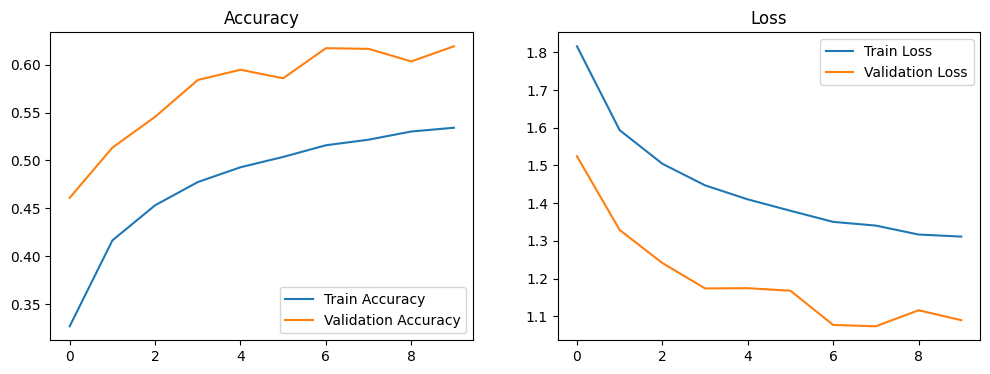

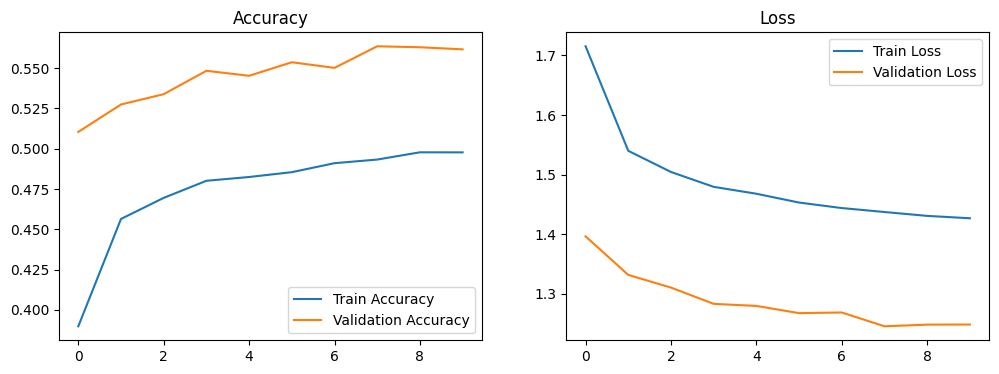

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import cifar10

# Загрузка данных
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Нормализация
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 классов
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    validation_data=(x_test, y_test),
                    epochs=10)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Замораживание слоев базовой модели
for layer in base_model.layers:
    layer.trainable = False

# Добавление классификатора
transfer_model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 классов
])

transfer_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Обучение модели transfer learning
history_tl = transfer_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                                validation_data=(x_test, y_test),
                                epochs=10)

def plot_metrics(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

plot_metrics(history)
plot_metrics(history_tl)


<ipython-input-3-c00dc0e4c83e>:28: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 110s 53ms/step - accuracy: 0.2891 - loss: 2.1190 - val_accuracy: 0.2728 - val_loss: 2.1945
Epoch 2/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 41ms/step - accuracy: 0.4405 - loss: 1.5969 - val_accuracy: 0.4759 - val_loss: 1.8358
Epoch 3/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.4895 - loss: 1.4613 - val_accuracy: 0.5489 - val_loss: 1.4480
Epoch 4/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.5111 - loss: 1.4013 - val_accuracy: 0.5710 - val_loss: 1.2844
Epoch 5/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.5207 - loss: 1.3647 - val_accuracy: 0.5788 - val_loss: 1.2290
Epoch 6/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.5279 - loss: 1.3317 - val_accuracy: 0.5846 - val_loss: 1.1990
Epoch 7/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.5436 - loss: 1.2997 - val_accuracy: 0.5871 - val_loss: 1.2024
Epoch 8/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms

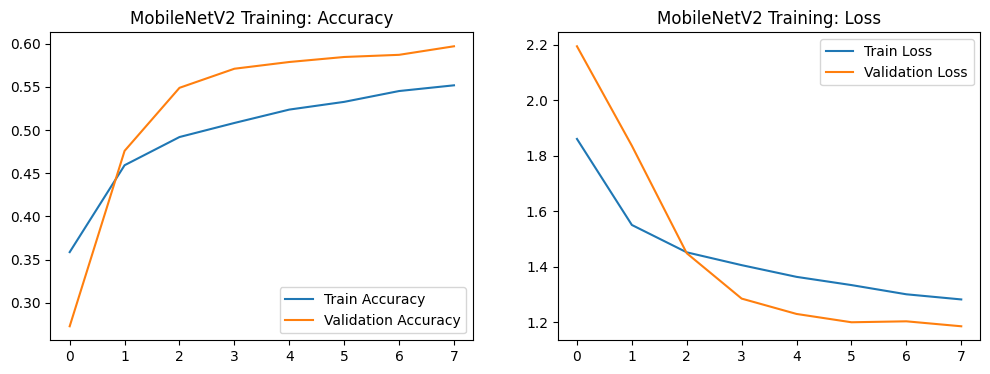

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Загрузка CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Нормализация и увеличение разрешения
x_train = tf.image.resize(x_train.astype('float32') / 255.0, (32, 32))
x_test = tf.image.resize(x_test.astype('float32') / 255.0, (32, 32))

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Аугментация данных
datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True
)
datagen.fit(x_train)

#MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Размораживаем последние 4 слоя
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Создаем модель
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
batch_size = 64
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    validation_data=(x_test, y_test),
                    epochs=8)

# Построение графиков
def plot_metrics(history, title="Training Metrics"):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title(f'{title}: Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title(f'{title}: Loss')
    plt.show()

plot_metrics(history, "MobileNetV2 Training")


Добавляем Dropout


<ipython-input-1-e7469bb5d31e>:26: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.4448 - loss: 1.6292 - val_accuracy: 0.6306 - val_loss: 1.0889 - learning_rate: 0.0010
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5707 - loss: 1.2392 - val_accuracy: 0.6420 - val_loss: 1.0496 - learning_rate: 0.0010
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5854 - loss: 1.1879 - val_accuracy: 0.6472 - val_loss: 1.0322 - learning_rate: 0.0010
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5994 - loss: 1.1560 - val_accuracy: 0.6503 - val_loss: 1.0145 - learning_rate: 0.0010
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6036 - loss: 1.1335 - val_accuracy: 0.6529 - val_loss: 1.0031 - learning_rate: 0.0010
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6098 - loss: 1.1211 - val_accuracy: 0.6537 - val_loss: 1.0004 - learning_rate: 0.0010
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6

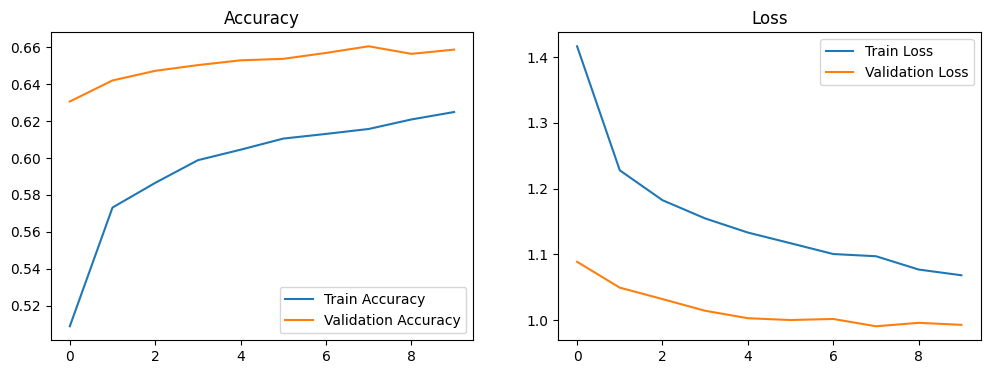

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Mixed Precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Подготовка данных
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = tf.image.resize(x_train, (64, 64))  # Начальное уменьшенное разрешение
x_test = tf.image.resize(x_test, (64, 64))
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(16).cache().prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(16).cache().prefetch(tf.data.AUTOTUNE)


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False  # Заморозка базы

transfer_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),  # Новый Dropout-слой (регуляризация)
    Dense(128, activation='relu'),
    Dropout(0.5),  # Существующий Dropout
    Dense(10, activation='softmax', dtype='float32')
])

# Компиляция
transfer_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Callbacks для оптимизации
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

# Обучение
history = transfer_model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    callbacks=[early_stop, reduce_lr]
)

# Функция построения графиков
def plot_metrics(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

# Визуализация
plot_metrics(history)


<ipython-input-4-6b3d77f08cbb>:28: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Epoch 1/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.1354 - loss: 2.2865 - val_accuracy: 0.2367 - val_loss: 2.2022
Epoch 2/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.2192 - loss: 2.1830 - val_accuracy: 0.2643 - val_loss: 2.0842
Epoch 3/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.2384 - loss: 2.0916 - val_accuracy: 0.2739 - val_loss: 2.0281
Epoch 4/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.2495 - loss: 2.0549 - val_accuracy: 0.2777 - val_loss: 2.0008
Epoch 5/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.2585 - loss: 2.0255 - val_accuracy: 0.2842 - val_loss: 1.9809
Epoch 6/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.2600 - loss: 2.0176 - val_accuracy: 0.2890 - val_loss: 1.9679
Epoch 7/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.2707 - loss: 2.0010 - val_accuracy: 0.2922 - val_loss: 1.9591
Epoch 8/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.2673 - loss: 1.9989 - val_accu

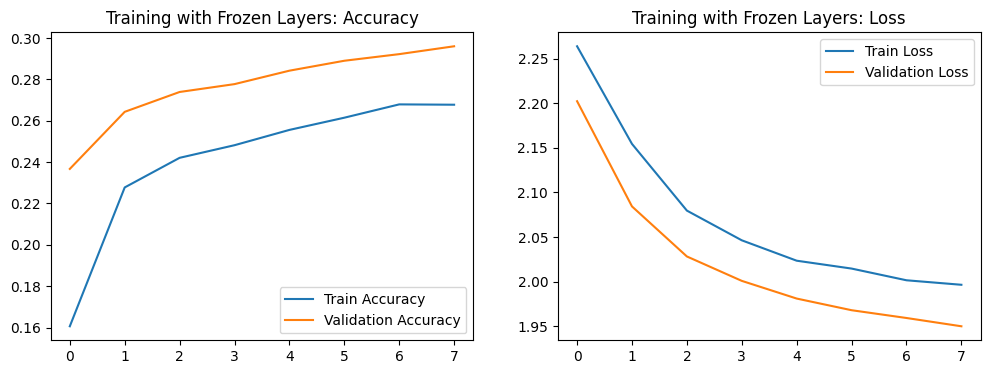

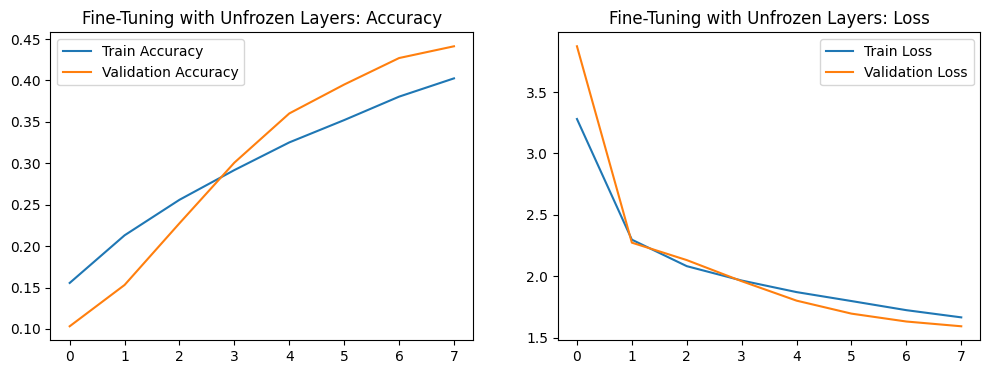

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Загрузка CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Нормализация и увеличение разрешения
x_train = tf.image.resize(x_train.astype('float32') / 255.0, (32, 32))
x_test = tf.image.resize(x_test.astype('float32') / 255.0, (32, 32))

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Аугментация данных
datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True
)
datagen.fit(x_train)

# Базовая модель MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Замораживаем все слои базовой модели
for layer in base_model.layers:
    layer.trainable = False

# Создаем модель
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели (с замороженными слоями)
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=8)

# Размораживаем все слои базовой модели для fine-tuning
for layer in base_model.layers:
    layer.trainable = True

# Компиляция модели с меньшей скоростью обучения для fine-tuning
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Дообучение модели с размороженными слоями
history_finetune = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                             validation_data=(x_test, y_test),
                             epochs=8)

# Функция для построения графиков
def plot_metrics(history, title="Training Metrics"):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title(f'{title}: Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title(f'{title}: Loss')
    plt.show()

# Графики обучения
plot_metrics(history, "Training with Frozen Layers")
plot_metrics(history_finetune, "Fine-Tuning with Unfrozen Layers")
